In [9]:
import sys
sys.path.append("..")  # Adjusts the path to include the parent directory

from rps_simulation.rps_base import RPS_core # Importing RPS_core class from rps_base.py
from rps_simulation.rps_multirun import RPS_multirun # Import multirun classvfor sims

from rps_simulation.learning_curves import exponential_learning, logistic_learning
from rps_simulation.forgetting_curves import exponential_forgetting 
from rps_simulation.practice_rate import simple_linear_rate 
from rps_simulation.waiting_times import exponential_waiting_time 

# import delay-discounting class to use with deadlines
from rps_simulation.practice_rate import tmt_hyperbolic_rate

import numpy as np
import matplotlib.pyplot as plt

concave_colour = '#466be8'
sigmoid_colour = '#f77150'

np.random.seed(10)


In [10]:
## Defining the learning, forgetting and practice functions:
simple_prac_func = simple_linear_rate(a=0.2, b=5) # sample practice function
exp_forgetting = exponential_forgetting(forgetting_rate=0.1) # setting forgetting function to exponential 
tmt_rate = tmt_hyperbolic_rate(impulsivity=2)

# setup deadline dict:
deadline_info = {'deadlines': [i*10 for i in range(1,11)],
                'deadline_weights': [10 for i in range(1,11)],
                'tmt_effect': tmt_rate}


deadline_info1 = {'deadlines': [100],
                'deadline_weights': [100],
                'tmt_effect': tmt_rate}



## 1.1 Run 1 simulation each for exponantial and logistic curves:

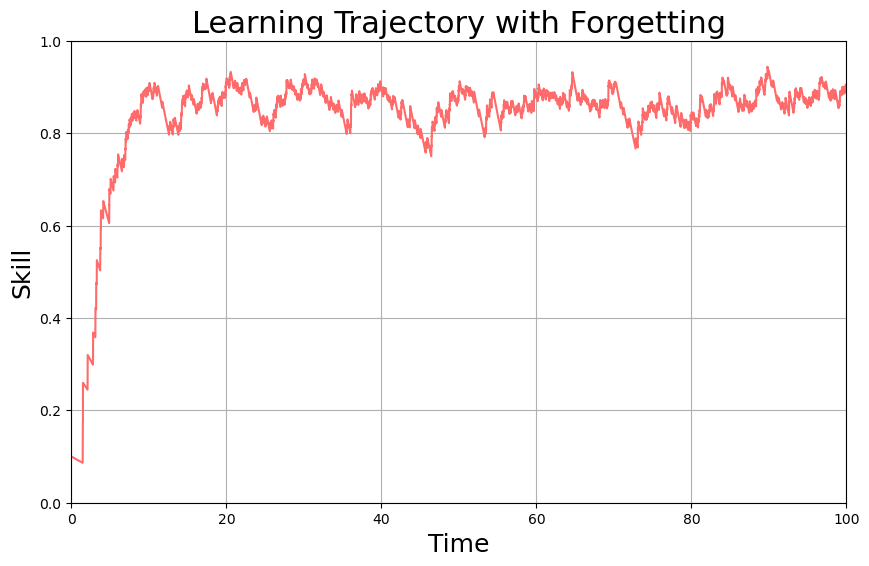

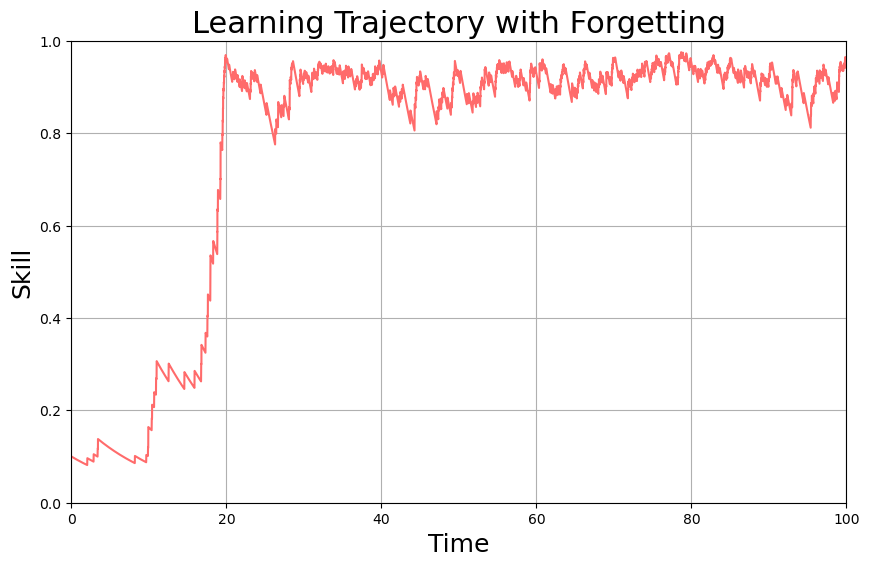

In [11]:
# Setting up the sim:
concave_sims_deadline = RPS_core(waiting_time_dist=exponential_waiting_time,
                                 learning_func=exponential_learning(alpha=0.1),
                                 forgetting_func=exp_forgetting,
                                 practice_rate_func=simple_prac_func,
                                 deadline_dict = deadline_info,  max_time=100)

sigmoid_sims_deadline = RPS_core(waiting_time_dist=exponential_waiting_time,
                                 learning_func= logistic_learning(alpha=0.2),
                                 forgetting_func=exp_forgetting,
                                 practice_rate_func=simple_prac_func,
                                 deadline_dict = deadline_info, max_time=100)


# Running 1 sim each for concave and logistic lc:
concave_sims_deadline.run_simulation()
concave_sims_deadline.plot_learning_trajectory()


sigmoid_sims_deadline.run_simulation()
sigmoid_sims_deadline.plot_learning_trajectory()


## 1.2 Multiple simulations for Logistic Curve - With and Without Deadline:

We test three cases:
1. No-Deadlines
2. 10 evenly-split assignment deadlines at time 10,20,...100, each with value 10.
3. 1 deadline at t=100 with value 100. 

Note that we expect deadlines to only positively affect the practice rate. We keep case 2 and 3 comparable by matching the total value of assignments. 

In [12]:
simple_prac_func = simple_linear_rate(a=0.1, b=5) # sample practice function

sigmoid_sims_nodeadline = RPS_multirun(waiting_time_dist=exponential_waiting_time,
                                 learning_func= logistic_learning(alpha=0.3),
                                 forgetting_func=exponential_forgetting(forgetting_rate=0.2),
                                 practice_rate_func=simple_prac_func,
                                max_time=100, n_sims=1000)

sigmoid_sims_deadline = RPS_multirun(waiting_time_dist=exponential_waiting_time,
                                 learning_func= logistic_learning(alpha=0.3),
                                 forgetting_func=exponential_forgetting(forgetting_rate=0.2),
                                 practice_rate_func=simple_prac_func,
                                 deadline_dict = deadline_info,       
                                 max_time=100, n_sims=1000)

sigmoid_sims_deadline1 = RPS_multirun(waiting_time_dist=exponential_waiting_time,
                                 learning_func= logistic_learning(alpha=0.3),
                                 forgetting_func=exponential_forgetting(forgetting_rate=0.2),
                                 practice_rate_func=simple_prac_func,
                                 deadline_dict = deadline_info1,       
                                 max_time=100, n_sims=1000)

sigmoid_sims_nodeadline.run_multiple_sims()
sigmoid_sims_deadline.run_multiple_sims()
sigmoid_sims_deadline1.run_multiple_sims()


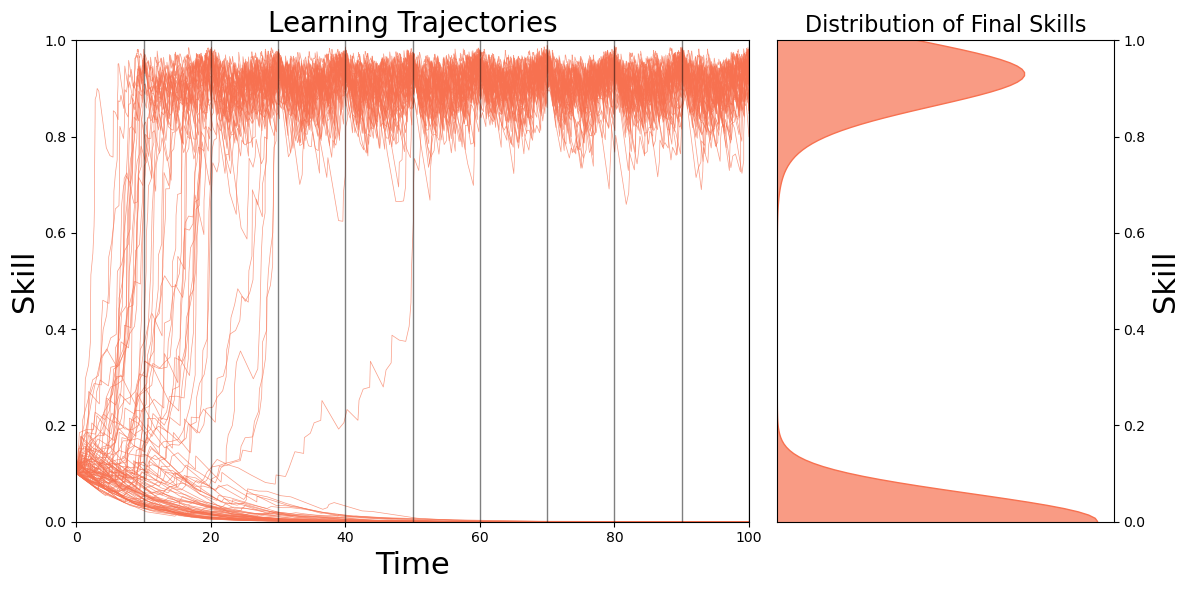

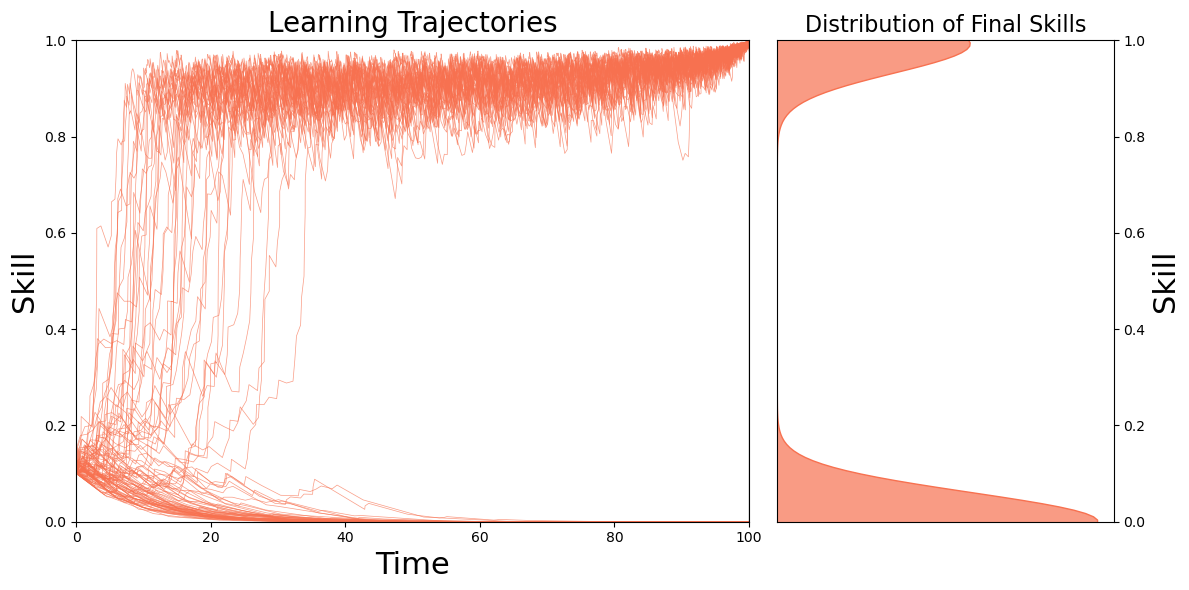

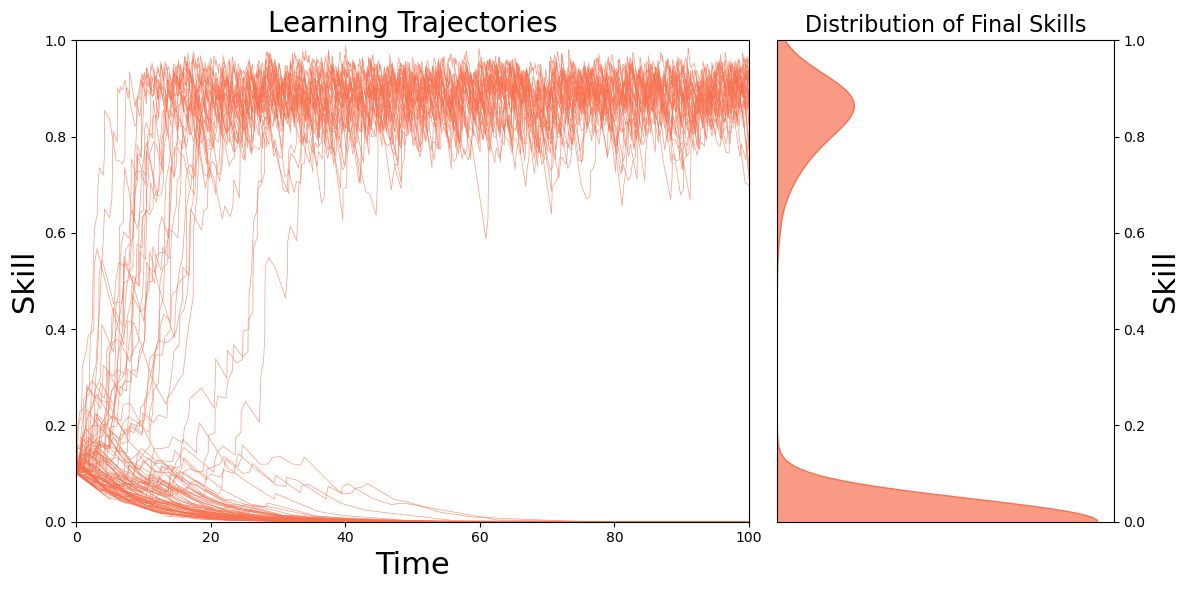

In [13]:
###### Setting up plots #######


sigmoid_sims_deadline.plot_trajectory_and_histogram(colour_lineplots=sigmoid_colour, colour_histogram=sigmoid_colour, 
                                bw_adjust =0.5, save_location='../plots/sigmoid_sims_deadlines.png')


sigmoid_sims_deadline1.plot_trajectory_and_histogram(colour_lineplots=sigmoid_colour, colour_histogram=sigmoid_colour,
                               bw_adjust=0.5, save_location='../plots/sigmoid_sims_nodeadlines.png')


sigmoid_sims_nodeadline.plot_trajectory_and_histogram(colour_lineplots=sigmoid_colour, colour_histogram=sigmoid_colour,
                               bw_adjust=0.5, save_location='../plots/sigmoid_sims_nodeadlines.png')




In [14]:
# No deadline
n0 = sum(np.array(sigmoid_sims_nodeadline.final_skills) > 0.5) # Total experts
tot0 = len(sigmoid_sims_nodeadline.final_skills) # Total learners

# 10 Deadlines, each value 10
n1 = sum(np.array(sigmoid_sims_deadline.final_skills) > 0.5) # Total experts
tot1 = len(sigmoid_sims_deadline.final_skills) # Total learners

# Only 1 deadline, valued 100
n2 = sum(np.array(sigmoid_sims_deadline1.final_skills) > 0.5) 
tot2 = len(sigmoid_sims_deadline.final_skills) 

print(n0, n1,n2)
print(tot0, tot1, tot2)

280 477 376
1000 1000 1000


In [15]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Count successes and total trials
successes =  [n1, n2]
n_trials = [tot1, tot2]

# Perform two-sample proportion Z-test
z_stat, p_value = proportions_ztest(successes, n_trials)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two proportions.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the two proportions.")

Z-statistic: 4.5664651447334474
P-value: 4.960174686008146e-06
Reject the null hypothesis: There is a significant difference between the two proportions.
